In [1]:
import os

MODEL_NAME = 'SSD_MobileNet_V2_FPNLite_320x320'
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TFRECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',MODEL_NAME, 'export'), 
#     'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
#     'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
}

In [5]:
files_paths = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TFRECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [18]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [7]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

Cloning into 'Tensorflow/models'...
remote: Enumerating objects: 58192, done.
remote: Counting objects: 100% (524/524), done.
remote: Compressing objects: 100% (238/238), done.
remote: Total 58192 (delta 294), reused 497 (delta 281), pack-reused 57668
Receiving objects: 100% (58192/58192), 573.15 MiB | 38.19 MiB/s, done.
Resolving deltas: 100% (40289/40289), done.


In [8]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e .

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Processing /content/Tensorflow/models/research
     |████████████████████████████████| 9.6MB 42.2MB/s 
     |████████████████████████████████| 358kB 38.1MB/s 
     |████████████████████████████████| 1.6MB 36.2MB/s 
     |████████████████████████████████| 2.3MB 40.7MB/s 
     |████████████████████████████████| 153kB 56.9MB/s 
     |████████████████████████████████| 61kB 9.5MB/s 
     |████████████████████████████████| 829kB 45.5MB/s 
     |████████████████████████████████| 1.2MB 38.2MB/s 
     |████████████████████████████████| 174kB 61.6MB/s 
     |████████████████████████████████| 38.2MB 59kB/s 
     |████████████████████████████████| 645kB 42.5MB/s 
     |████████████████████████████████| 61kB 10.1MB/s 
     |████████████████████████████████| 51kB 8.7MB/s 
   

In [9]:
from google.colab import files
files.upload() #upload kaggle.json

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d karthika95/pedestrian-detection
!unzip /content/pedestrian-detection.zip -d {paths['IMAGE_PATH']}

Saving kaggle.json to kaggle.json
kaggle.json
 96% 180M/187M [00:01<00:00, 162MB/s]
100% 187M/187M [00:01<00:00, 159MB/s]
Archive:  /content/pedestrian-detection.zip
  inflating: Tensorflow/workspace/images/Test/Test/Annotations/image (1).xml  
  inflating: Tensorflow/workspace/images/Test/Test/Annotations/image (10).xml  
  inflating: Tensorflow/workspace/images/Test/Test/Annotations/image (100).xml  
  inflating: Tensorflow/workspace/images/Test/Test/Annotations/image (101).xml  
  inflating: Tensorflow/workspace/images/Test/Test/Annotations/image (102).xml  
  inflating: Tensorflow/workspace/images/Test/Test/Annotations/image (103).xml  
  inflating: Tensorflow/workspace/images/Test/Test/Annotations/image (104).xml  
  inflating: Tensorflow/workspace/images/Test/Test/Annotations/image (105).xml  
  inflating: Tensorflow/workspace/images/Test/Test/Annotations/image (106).xml  
  inflating: Tensorflow/workspace/images/Test/Test/Annotations/image (107).xml  
  inflating: Tensorflow/wor

In [10]:
# Create labelmap

labels = [
          {'name':'person', 'id':1},
          {'name':'person-like', 'id':2}
]

with open(files_paths['LABELMAP'], 'w+') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# Load trained model from checkpoint

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
# !rm -r {paths['CHECKPOINT_PATH']}
!tar -zxvf /content/drive/MyDrive/people-detection-model.tar.gz -C /content

Tensorflow/workspace/models/SSD_MobileNet_V2_FPNLite_320x320/
Tensorflow/workspace/models/SSD_MobileNet_V2_FPNLite_320x320/ckpt-15.data-00000-of-00001
Tensorflow/workspace/models/SSD_MobileNet_V2_FPNLite_320x320/ckpt-20.data-00000-of-00001
Tensorflow/workspace/models/SSD_MobileNet_V2_FPNLite_320x320/ckpt-16.data-00000-of-00001
Tensorflow/workspace/models/SSD_MobileNet_V2_FPNLite_320x320/eval/
Tensorflow/workspace/models/SSD_MobileNet_V2_FPNLite_320x320/eval/events.out.tfevents.1623261420.f82a39d09be9.1432.1381.v2
Tensorflow/workspace/models/SSD_MobileNet_V2_FPNLite_320x320/train/
Tensorflow/workspace/models/SSD_MobileNet_V2_FPNLite_320x320/train/events.out.tfevents.1623257262.f82a39d09be9.632.1550.v2
Tensorflow/workspace/models/SSD_MobileNet_V2_FPNLite_320x320/ckpt-17.index
Tensorflow/workspace/models/SSD_MobileNet_V2_FPNLite_320x320/export/
Tensorflow/workspace/models/SSD_MobileNet_V2_FPNLite_320x320/export/checkpoint/
Tensorflow/workspace/models/SSD_MobileNet_V2_FPNLite_320x320/expor

In [23]:
# Upload checkpoint folder to local runtime previously
import tensorflow as tf
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import label_map_util, config_util
from object_detection.builders import model_builder

# Load pipeline config and build detection model
configs = config_util.get_configs_from_pipeline_file(files_paths['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoints
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'],'ckpt-21')).expect_partial()

In [40]:
img_url = 'https://www.abrahamwatkins.com/wp-content/uploads/sites/1200258/2020/12/Crossing-street-pedestrians-road.jpg'
!wget {img_url}

--2021-06-10 05:14:24--  https://www.abrahamwatkins.com/wp-content/uploads/sites/1200258/2020/12/Crossing-street-pedestrians-road.jpg
Resolving www.abrahamwatkins.com (www.abrahamwatkins.com)... 104.16.108.239, 104.16.109.239, 104.16.112.239, ...
Connecting to www.abrahamwatkins.com (www.abrahamwatkins.com)|104.16.108.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 134083 (131K) [image/jpeg]
Saving to: ‘Crossing-street-pedestrians-road.jpg’

Crossing-street-ped 100%[===================>] 130.94K  --.-KB/s    in 0.02s   

2021-06-10 05:14:24 (6.12 MB/s) - ‘Crossing-street-pedestrians-road.jpg’ saved [134083/134083]



In [41]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

@tf.function
def detect_image(image):
  image, shapes = detection_model.preprocess(image)
  detections = detection_model.predict(image, shapes)
  detections_dict = detection_model.postprocess(detections,shapes)
  return detections_dict

category_index = label_map_util.create_category_index_from_labelmap(files_paths['LABELMAP'])
TEST_IMAGE_PATH = '/content/Crossing-street-pedestrians-road.jpg'

In [42]:
img = np.array(cv.imread(TEST_IMAGE_PATH))
input_tensor = tf.convert_to_tensor(np.expand_dims(img, 0), dtype=tf.float32)
# print(input_tensor)

result = detect_image(input_tensor)
num_detections = int(result.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy() for key, value in result.items()}
detections['num_detections'] = num_detections
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

print(detections)

{'detection_boxes': array([[2.46160120e-01, 4.68446195e-01, 8.22143555e-01, 6.42100036e-01],
       [1.93258107e-01, 3.35946411e-01, 8.62982810e-01, 5.44288874e-01],
       [1.22730434e-01, 6.19385481e-01, 8.34339797e-01, 7.99944639e-01],
       [1.85024798e-01, 3.30457985e-01, 8.62102687e-01, 5.07478893e-01],
       [1.13470256e-01, 6.22366786e-01, 8.26215625e-01, 8.11015010e-01],
       [1.66939616e-01, 4.13612694e-01, 8.78973126e-01, 6.61143422e-01],
       [2.02003032e-01, 3.15606296e-01, 7.34615922e-01, 4.85666156e-01],
       [1.91703171e-01, 3.45312655e-01, 5.49910188e-01, 4.77768958e-01],
       [3.66773486e-01, 4.63159055e-01, 5.80385089e-01, 5.06418824e-01],
       [5.94114363e-02, 6.94602057e-02, 4.82992679e-01, 1.68520808e-01],
       [9.72373486e-02, 5.36255598e-01, 8.60448956e-01, 7.88084030e-01],
       [1.34571850e-01, 6.63732708e-01, 6.54715419e-01, 7.80114472e-01],
       [2.93612540e-01, 5.10841846e-01, 5.88741302e-01, 6.13607168e-01],
       [1.91703171e-01, 3.45312

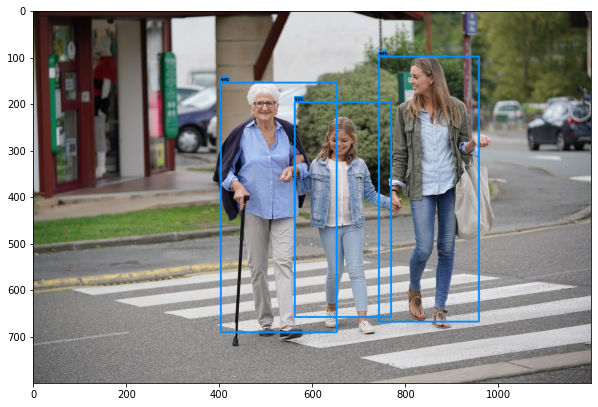

In [44]:
img_with_detections = img.copy()
label_offset=1

viz_utils.visualize_boxes_and_labels_on_image_array(
    img_with_detections,
    detections['detection_boxes'],
    detections['detection_classes']+label_offset,
    detections['detection_scores'],
    category_index,
    use_normalized_coordinates=True,
    max_boxes_to_draw=8,
    agnostic_mode=True,
    min_score_thresh = 0.4
)

plt.figure(figsize=(10,8))
plt.imshow(cv.cvtColor(img_with_detections,cv.COLOR_BGR2RGB))